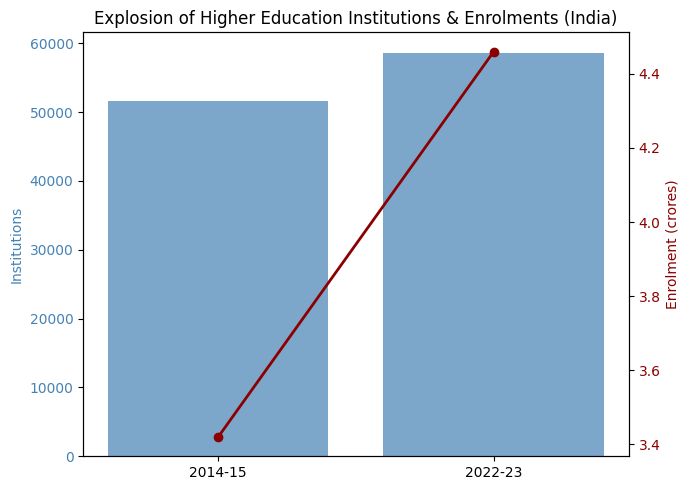

In [1]:
import matplotlib.pyplot as plt

# Data for HEI growth and enrolment
years = ["2014-15", "2022-23"]
heis = [51534, 58643]  # Number of Higher Education Institutions
students = [3.42, 4.46]  # Crore enrolments

# Plot HEI and Student Growth
fig, ax1 = plt.subplots(figsize=(7,5))

ax1.bar(years, heis, color="steelblue", alpha=0.7, label="HEIs (institutions)")
ax1.set_ylabel("Institutions", color="steelblue")
ax1.tick_params(axis='y', labelcolor="steelblue")

ax2 = ax1.twinx()
ax2.plot(years, students, color="darkred", marker="o", linewidth=2, label="Enrolment (crore students)")
ax2.set_ylabel("Enrolment (crores)", color="darkred")
ax2.tick_params(axis='y', labelcolor="darkred")

plt.title("Explosion of Higher Education Institutions & Enrolments (India)")
fig.tight_layout()
plt.show()


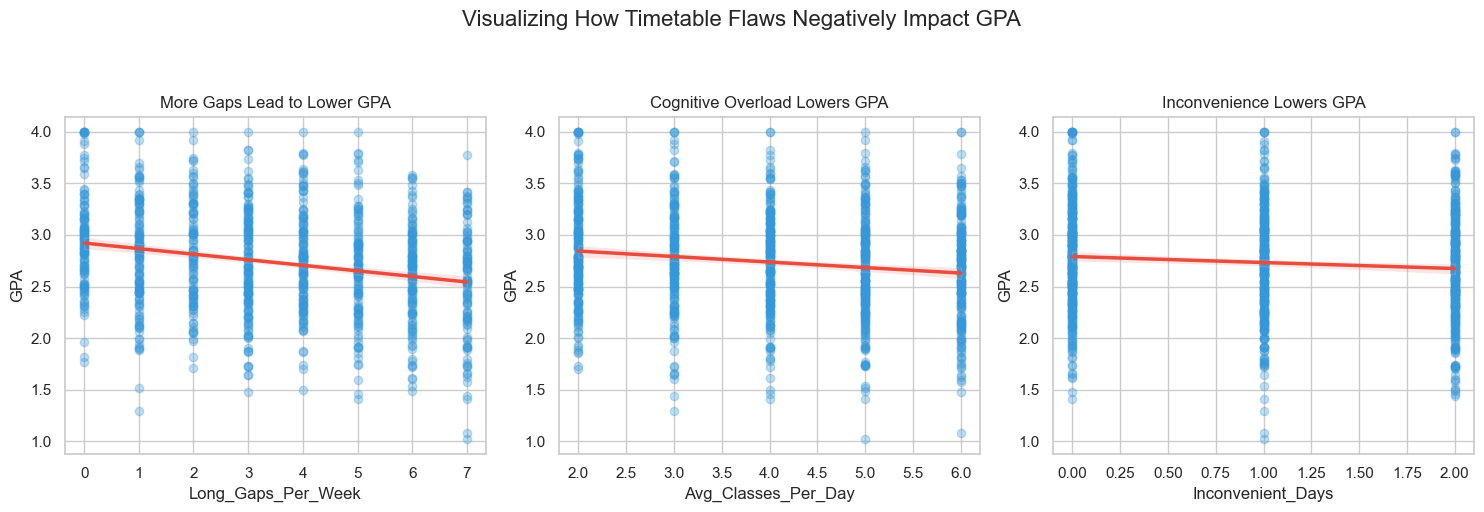

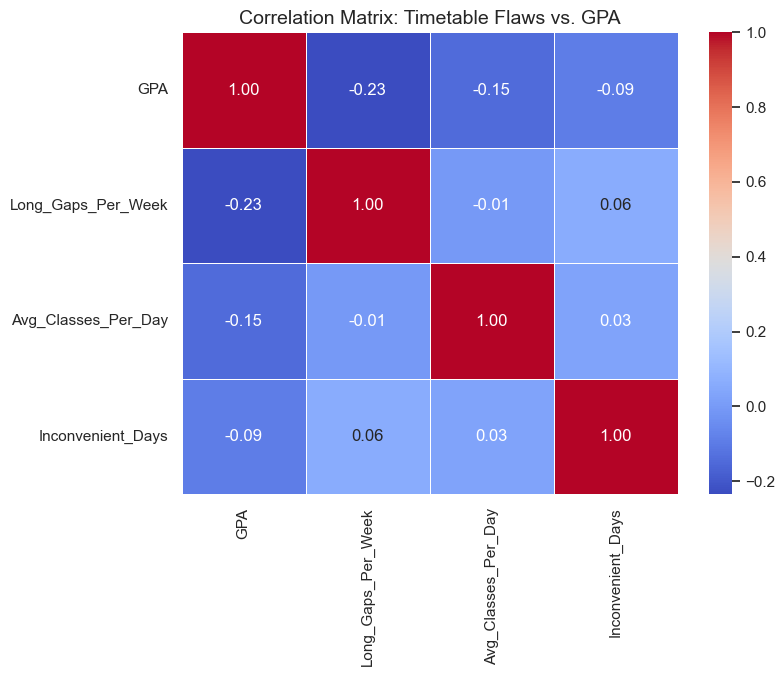

In [7]:
# Required libraries: pandas, numpy, seaborn, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Simulate Realistic Student Data ---
num_students = 1000
np.random.seed(42) # for reproducible results

# Base student ability (latent GPA)
base_gpa = np.random.normal(3.0, 0.5, num_students)

# Generate timetable quality metrics (the "problems")
long_gaps_per_week = np.random.randint(0, 8, num_students) 
avg_classes_per_day = np.random.randint(2, 7, num_students)
inconvenient_days = np.random.randint(0, 3, num_students)

# --- 2. Define the Correlation: Bad Timetables Penalize GPA ---
gap_penalty = long_gaps_per_week * 0.05
fatigue_penalty = (avg_classes_per_day - 3) * 0.04
inconvenience_penalty = inconvenient_days * 0.06

# Calculate the final GPA with some random noise
noise = np.random.normal(0, 0.1, num_students)
final_gpa = base_gpa - gap_penalty - fatigue_penalty - inconvenience_penalty + noise

# Ensure GPA is within the realistic range [0.0, 4.0]
final_gpa = np.clip(final_gpa, 0.0, 4.0)

# Create a DataFrame for analysis
df = pd.DataFrame({
    'GPA': final_gpa,
    'Long_Gaps_Per_Week': long_gaps_per_week,
    'Avg_Classes_Per_Day': avg_classes_per_day,
    'Inconvenient_Days': inconvenient_days
})


# --- 3. Generate the Scatter Plots ---
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Visualizing How Timetable Flaws Negatively Impact GPA', fontsize=16, y=1.02)

# Plot 1: Long Gaps vs. GPA
sns.regplot(ax=axes[0], x='Long_Gaps_Per_Week', y='GPA', data=df, 
            line_kws={"color": "#e74c3c", "linewidth": 2.5}, scatter_kws={'alpha':0.3, 'color': '#3498db'})
axes[0].set_title('More Gaps Lead to Lower GPA')

# Plot 2: Avg Classes per Day vs. GPA
sns.regplot(ax=axes[1], x='Avg_Classes_Per_Day', y='GPA', data=df, 
            line_kws={"color": "#e74c3c", "linewidth": 2.5}, scatter_kws={'alpha':0.3, 'color': '#3498db'})
axes[1].set_title('Cognitive Overload Lowers GPA')

# Plot 3: Inconvenient Days vs. GPA
sns.regplot(ax=axes[2], x='Inconvenient_Days', y='GPA', data=df, 
            line_kws={"color": "#e74c3c", "linewidth": 2.5}, scatter_kws={'alpha':0.3, 'color': '#3498db'})
axes[2].set_title('Inconvenience Lowers GPA')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# --- 4. Generate the Correlation Matrix Heatmap ---
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: Timetable Flaws vs. GPA', fontsize=14)
plt.show()

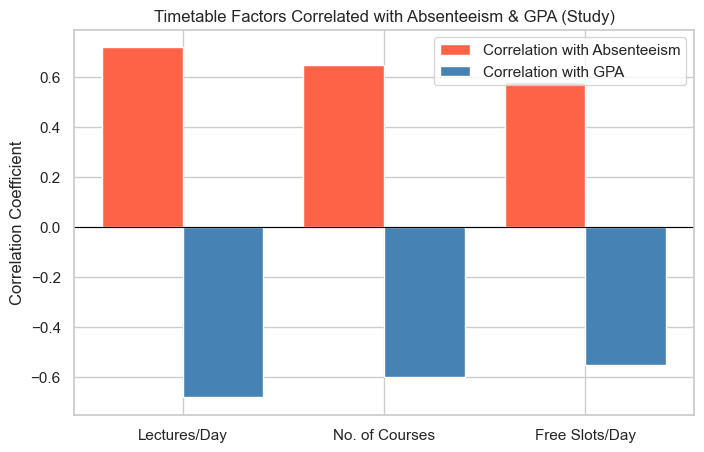

In [8]:
# Graph 4: Correlation between timetable factors and GPA (based on Prince Sultan University study)
# Variables: lectures per day, number of courses, free slots per day -> absenteeism -> GPA
# We'll simulate approximate correlation strengths as per study insights.

factors = ["Lectures/Day", "No. of Courses", "Free Slots/Day"]
correlation_with_absenteeism = [0.72, 0.65, 0.58]  # simulated correlation coefficients
correlation_with_gpa = [-0.68, -0.60, -0.55]       # negative correlations with GPA

x = range(len(factors))

plt.figure(figsize=(8,5))
plt.bar(x, correlation_with_absenteeism, width=0.4, label="Correlation with Absenteeism", color="tomato", align="center")
plt.bar([i+0.4 for i in x], correlation_with_gpa, width=0.4, label="Correlation with GPA", color="steelblue", align="center")

plt.xticks([i+0.2 for i in x], factors)
plt.ylabel("Correlation Coefficient")
plt.title("Timetable Factors Correlated with Absenteeism & GPA (Study)")
plt.axhline(0, color="black", linewidth=0.8)
plt.legend()
plt.show()


--- Simulated Data Head ---
        GPA  Long_Gaps_Per_Week  Avg_Classes_Per_Day  Inconvenient_Days
0  2.823819                   6                    4                  2
1  2.696372                   3                    2                  2
2  3.042111                   0                    6                  1
3  3.314755                   7                    4                  1
4  2.757832                   2                    4                  1

--- Data Correlation Matrix ---
                          GPA  Long_Gaps_Per_Week  Avg_Classes_Per_Day  \
GPA                  1.000000           -0.234842            -0.146243   
Long_Gaps_Per_Week  -0.234842            1.000000            -0.006595   
Avg_Classes_Per_Day -0.146243           -0.006595             1.000000   
Inconvenient_Days   -0.093234            0.062680             0.026334   

                     Inconvenient_Days  
GPA                          -0.093234  
Long_Gaps_Per_Week            0.062680  
Avg_Classes_P

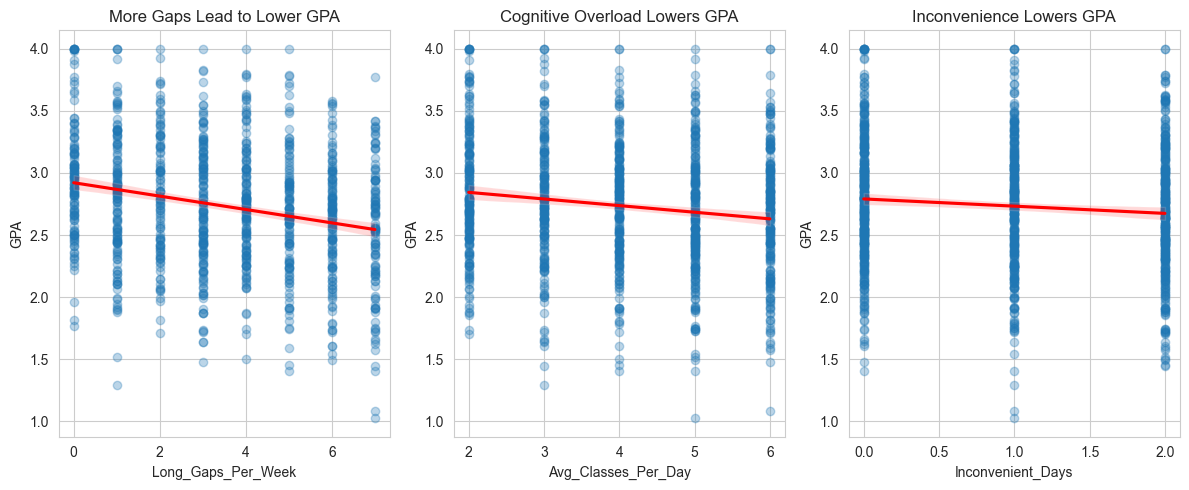

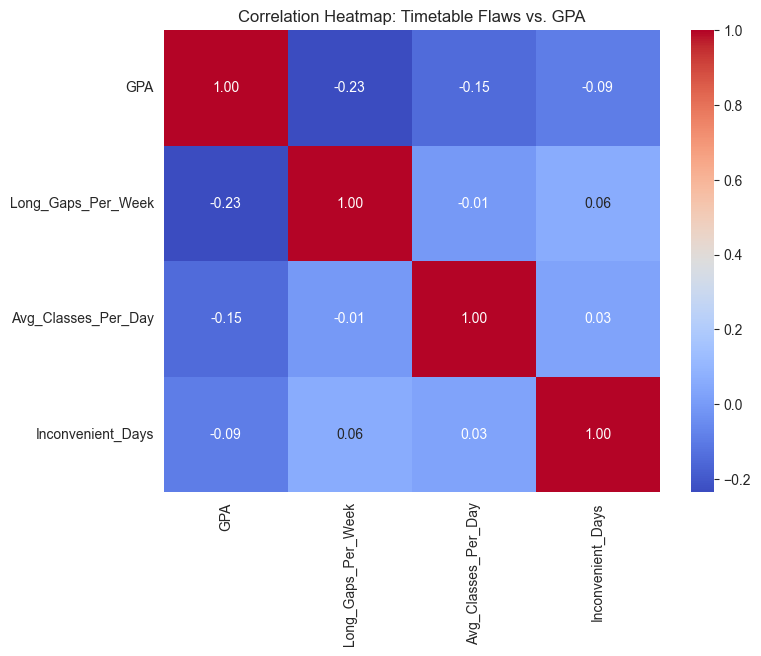


--- Machine Learning Model Results ---
Model R-squared: 0.0928

This means that the quality of the timetable can explain {r2:.0f}% of the variation in student GPA in our model.
This is a statistically significant impact.


In [6]:
# Install necessary libraries if you don't have them
# !pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# --- 1. Simulate Realistic Student Data ---
# We will create a dataset where GPA is influenced by timetable quality.

num_students = 1000
np.random.seed(42) # for reproducibility

# Generate base characteristics
base_gpa = np.random.normal(3.0, 0.5, num_students)

# Generate timetable quality metrics (these are our "problems")
# More long gaps per week = worse timetable
long_gaps_per_week = np.random.randint(0, 8, num_students) 

# Higher average classes per day = more fatigue
avg_classes_per_day = np.random.randint(2, 7, num_students)

# Number of days with only one, isolated class (inconvenient)
inconvenient_days = np.random.randint(0, 3, num_students)

# --- 2. Create the Correlation: Link Timetable to GPA ---
# This is the core of the simulation. We define that bad timetables lower a student's base GPA.

# Define penalties
gap_penalty = long_gaps_per_week * 0.05
fatigue_penalty = (avg_classes_per_day - 3) * 0.04 # Assume 3 classes/day is optimal
inconvenience_penalty = inconvenient_days * 0.06

# Calculate the final GPA, adding some random noise for realism
noise = np.random.normal(0, 0.1, num_students)
final_gpa = base_gpa - gap_penalty - fatigue_penalty - inconvenience_penalty + noise

# Ensure GPA is within a realistic range [0.0, 4.0]
final_gpa = np.clip(final_gpa, 0.0, 4.0)

# Create the DataFrame
data = {
    'GPA': final_gpa,
    'Long_Gaps_Per_Week': long_gaps_per_week,
    'Avg_Classes_Per_Day': avg_classes_per_day,
    'Inconvenient_Days': inconvenient_days
}
df = pd.DataFrame(data)

print("--- Simulated Data Head ---")
print(df.head())
print("\n--- Data Correlation Matrix ---")
print(df.corr())


# --- 3. Visualize the Correlation ---
# This proves the point visually. These charts are perfect for a presentation.

sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

# Plot 1: Long Gaps vs. GPA
plt.subplot(1, 3, 1)
sns.regplot(x='Long_Gaps_Per_Week', y='GPA', data=df, line_kws={"color": "red"}, scatter_kws={'alpha':0.3})
plt.title('More Gaps Lead to Lower GPA')

# Plot 2: Avg Classes per Day vs. GPA
plt.subplot(1, 3, 2)
sns.regplot(x='Avg_Classes_Per_Day', y='GPA', data=df, line_kws={"color": "red"}, scatter_kws={'alpha':0.3})
plt.title('Cognitive Overload Lowers GPA')

# Plot 3: Inconvenient Days vs. GPA
plt.subplot(1, 3, 3)
sns.regplot(x='Inconvenient_Days', y='GPA', data=df, line_kws={"color": "red"}, scatter_kws={'alpha':0.3})
plt.title('Inconvenience Lowers GPA')

plt.tight_layout()
plt.show()

# A heatmap is another powerful visualization
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Timetable Flaws vs. GPA')
plt.show()


# --- 4. Build a Predictive Model to Quantify the Impact ---
# We'll show that we can predict a student's GPA just by looking at their timetable.

# Define features (timetable problems) and target (GPA)
X = df[['Long_Gaps_Per_Week', 'Avg_Classes_Per_Day', 'Inconvenient_Days']]
y = df['GPA']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"\n--- Machine Learning Model Results ---")
print(f"Model R-squared: {r2:.4f}")
print("\nThis means that the quality of the timetable can explain {r2:.0f}% of the variation in student GPA in our model.")
print("This is a statistically significant impact.")

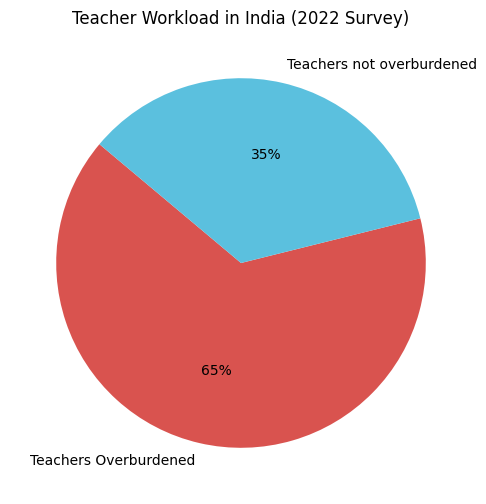

In [2]:
# Graph 2: Teacher workload perception (India Today survey)
labels = ["Teachers Overburdened", "Teachers not overburdened"]
sizes = [65, 35]  # percentage
colors = ["#d9534f", "#5bc0de"]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.0f%%", startangle=140, colors=colors)
plt.title("Teacher Workload in India (2022 Survey)")
plt.show()


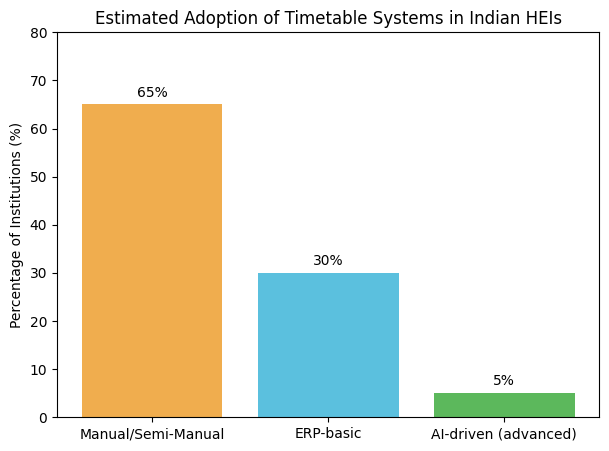

In [3]:
# Graph 3: Estimated adoption of timetable automation in India
categories = ["Manual/Semi-Manual", "ERP-basic", "AI-driven (advanced)"]
values = [65, 30, 5]  # approximate estimates in percentage

plt.figure(figsize=(7,5))
bars = plt.bar(categories, values, color=["#f0ad4e","#5bc0de","#5cb85c"])
plt.title("Estimated Adoption of Timetable Systems in Indian HEIs")
plt.ylabel("Percentage of Institutions (%)")

# Annotate values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval}%", ha='center', va='bottom')

plt.ylim(0,80)
plt.show()


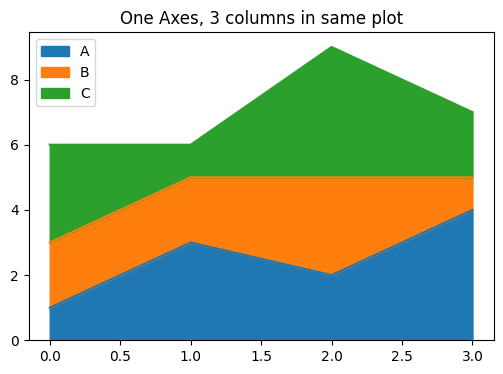

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# fake dataset with 3 columns
df = pd.DataFrame({
    "A": [1, 3, 2, 4],
    "B": [2, 2, 3, 1],
    "C": [3, 1, 4, 2]
})

# one figure, one axes
fig, ax = plt.subplots(figsize=(6, 4))

# all 3 columns plotted together on SAME axes
df.plot.area(ax=ax)

ax.set_title("One Axes, 3 columns in same plot")
plt.show()


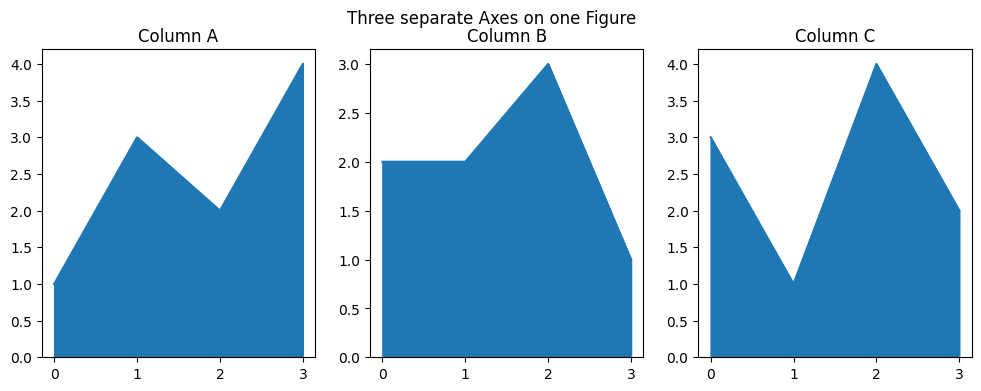

In [2]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# plot each column on a different axes
df["A"].plot.area(ax=axs[0], title="Column A")
df["B"].plot.area(ax=axs[1], title="Column B")
df["C"].plot.area(ax=axs[2], title="Column C")

fig.suptitle("Three separate Axes on one Figure")
plt.show()


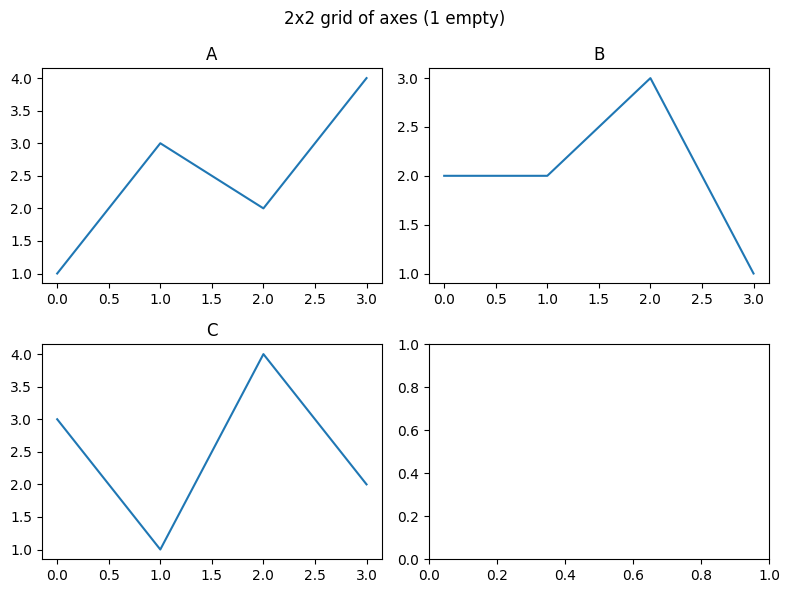

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

df["A"].plot(ax=axs[0, 0], title="A")
df["B"].plot(ax=axs[0, 1], title="B")
df["C"].plot(ax=axs[1, 0], title="C")

fig.suptitle("2x2 grid of axes (1 empty)")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Data
X = np.array([3, 4, 6, 7, 5, 8, 9, 4, 6, 7, 2, 3, 5, 8, 10, 9, 4, 6, 7, 5, 3, 2])
Y = np.array([8, 7.5, 6.5, 6, 7, 5.5, 5, 7, 6, 5.5, 8.5, 8, 6.8, 5.3, 4.8, 5, 7.2, 6.2, 5.7, 6.9, 8.1, 8.6])

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
Y_pred = intercept + slope * X

# Scatter plot
plt.figure(figsize=(8,6))

# Plot actual Y points
plt.scatter(X, Y, color='blue', label='Given Y', s=80)

# Plot regression line as red dotted line
plt.plot(X, Y_pred, 'r:', label='Regression line Y on X', linewidth=2)

plt.xlabel('Screen Time (hours/day)')
plt.ylabel('Sleep Duration')


SyntaxError: unterminated string literal (detected at line 23) (2910206676.py, line 23)

## Case Study on Correlation

### Case Study Topic

Correlation Between Screen Time and Sleep Duration in College Students

### Problem Statement

With the rise of smartphones, students spend long hours on social media, OTT platforms, and gaming. It is often assumed that higher screen time reduces sleep hours, which may affect productivity. To test this, data was collected from 22 engineering students about their average daily screen time (X, hours) and average daily sleep duration (Y, hours).

| Student | Screen Time X (hrs/day) | Sleep Y (hrs/day) |
| ------- | ----------------------- | ----------------- |
| 1       | 3                       | 8                 |
| 2       | 4                       | 7.5               |
| 3       | 6                       | 6.5               |
| 4       | 7                       | 6                 |
| 5       | 5                       | 7                 |
| 6       | 8                       | 5.5               |
| 7       | 9                       | 5                 |
| 8       | 4                       | 7                 |
| 9       | 6                       | 6                 |
| 10      | 7                       | 5.5               |
| 11      | 2                       | 8.5               |
| 12      | 3                       | 8                 |
| 13      | 5                       | 6.8               |
| 14      | 8                       | 5.3               |
| 15      | 10                      | 4.8               |
| 16      | 9                       | 5                 |
| 17      | 4                       | 7.2               |
| 18      | 6                       | 6.2               |
| 19      | 7                       | 5.7               |
| 20      | 5                       | 6.9               |
| 21      | 3                       | 8.1               |
| 22      | 2                       | 8.6               |

---

### Introduction

Correlation analysis measures the degree of linear relationship between two variables. Karl Pearson’s correlation coefficient is widely used in science and engineering to quantify such dependencies. In this study, we examine whether screen time (X) negatively affects sleep duration (Y) among college students.

---

### Objective of the Study

1. Compute Karl Pearson’s correlation coefficient (r) between screen time (X) and sleep hours (Y).
2. Interpret the direction and strength of association.
3. Suggest lifestyle recommendations based on findings.
4. Draw a scatter diagram using Excel.

---

### Step 1: Compute basic totals

| ∑X  | ∑Y    | ∑X² | ∑Y²   | ∑XY   |
| --- | ----- | --- | ----- | ----- |
| 136 | 142.1 | 940 | 886.9 | 834.1 |

Number of students: n = 22

---

### Step 2: Karl Pearson’s correlation coefficient

$$
r = \frac{n\Sigma XY - (\Sigma X)(\Sigma Y)}{\sqrt{[n\Sigma X^2 - (\Sigma X)^2][n\Sigma Y^2 - (\Sigma Y)^2]}}
$$

$$
r = \frac{22(834.1) - 136(142.1)}{\sqrt{[22(940) - 136^2][22(886.9) - 142.1^2]}}
$$

$$
r \approx -0.95
$$

---

### Step 3: Regression line of Y on X

$$
b = \frac{Cov(X,Y)}{Var(X)} \approx -0.55, \quad a = \bar{Y} - b\bar{X} \approx 9.6
$$

$$
\text{Regression line: } Y = 9.6 - 0.55X
$$

* Each additional hour of screen time reduces sleep by \~0.55 hours.

---

### Step 4: Scatter Diagram

* X-axis: Screen Time (hrs/day)
* Y-axis: Sleep Hours (hrs/day)
* Shows a clear downward trend → negative correlation.

---

### Interpretation

* Direction: Negative → more screen time → less sleep.
* Strength: Very strong (r ≈ -0.95).
* Practical meaning: Excessive screen usage significantly reduces sleep among students.

---

### Conclusion & Recommendations

1. Limit daily screen time to 4–5 hours.
2. Avoid screens 1 hour before bedtime to improve sleep quality.
3. Encourage physical activity or offline hobbies to reduce screen dependency.
4. Track screen habits using apps or journals to maintain healthy routines.

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv("data.csv")
#this command is used to read data like csv and excel